In [67]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.optimize import minimize, Bounds
from scipy.stats import logistic, norm
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

Vil organisere i funksjoner slik at jeg kan teste ting..

In [78]:
def make_data(N=100,square=False,interact=False):
    x1 = np.random.uniform(-1,1,N)
    x2 = x1 + np.random.uniform(-2,2,N)
    X = np.c_[x1,x2]
    if square:
        X = np.c_[X,x1**2,x2**2]
    if interact:
        X = np.c_[X,x1*x2]
    β = np.random.randint(-5,5,X.shape[1])
    y = X@β+ np.random.normal(size=N)
    y = (y>y.mean()).astype(int)
    return X,y

In [79]:
def make_plot(clf, X,y, threeD = False):
    m = 50
    clf = clf.fit(X,y)
    x1_grid = np.linspace(min(X[:,0]),max(X[:,0]),m)
    x2_grid = np.linspace(min(X[:,1]),max(X[:,1]),m)
    X1,X2 = np.meshgrid(x1_grid,x2_grid)
    X_grid = np.c_[X1.flatten(),X2.flatten()]
    if X.shape[1] > 4:
        X_grid = np.c_[X_grid,X_grid[:,0]**2,X_grid[:,1]**2]
        X_grid = np.c_[X_grid,X_grid[:,0]*X_grid[:,1]]
    elif X.shape[1] == 4:
        X_grid = np.c_[X_grid,X_grid[:,0]**2,X_grid[:,1]**2]
    elif X.shape[1] == 3:
        X_grid = np.c_[X_grid,X_grid[:,0]*X_grid[:,1]]
    P = clf.predict_proba(X_grid)[:,1]
    P = P.reshape((m,m))
    if not threeD:
        plt.contourf(X1,X2,P,cmap='RdBu')
        plt.scatter(X[:,0],X[:,1],c=y,cmap='RdBu')
    else:
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111,projection="3d")
        ax.plot_surface(X1,X2,P,cmap='RdBu',alpha=0.8)
        ax.scatter(X[:,0],X[:,1],y,c=y,cmap='RdBu')

In [134]:
X,y = make_data(N=200,interact=0,square=1)

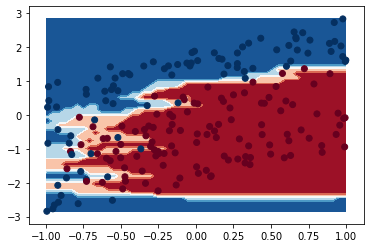

In [135]:
make_plot(KNeighborsClassifier(3),X,y)

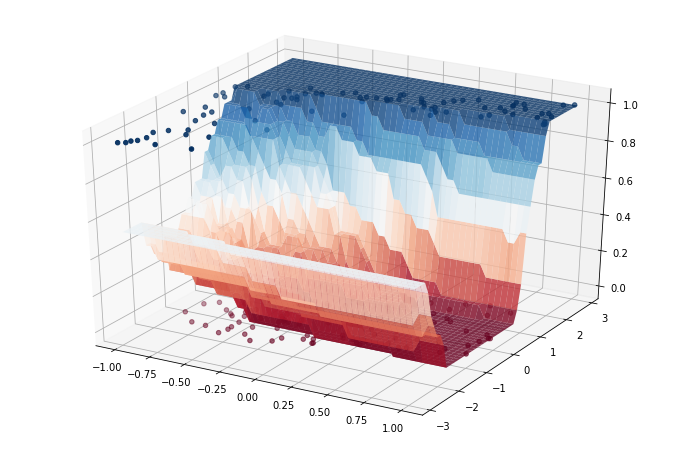

In [136]:
make_plot(KNeighborsClassifier(15),X,y,threeD=1)

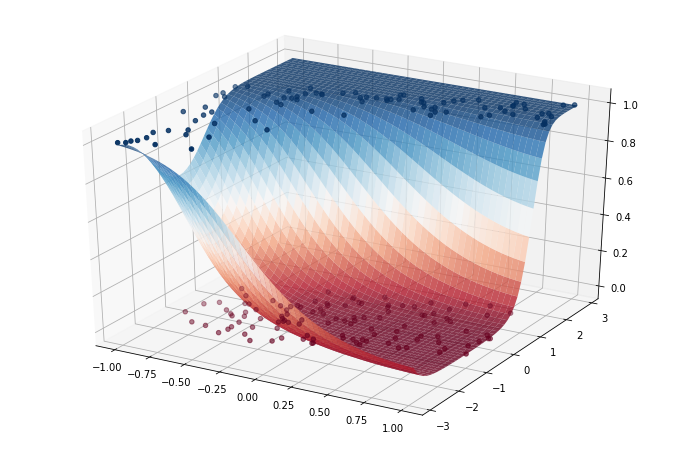

In [138]:
make_plot(LogisticRegression(),X,y,1)

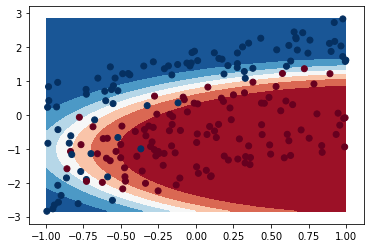

In [139]:
make_plot(LogisticRegression(),X,y,0)

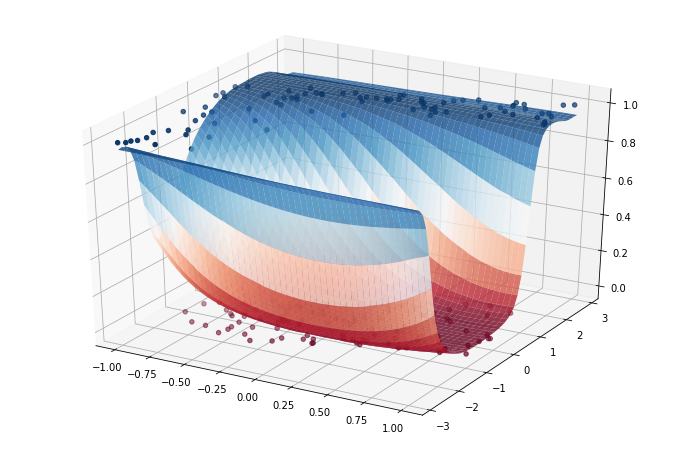

In [140]:
make_plot(SVC(probability=1),X,y,1)

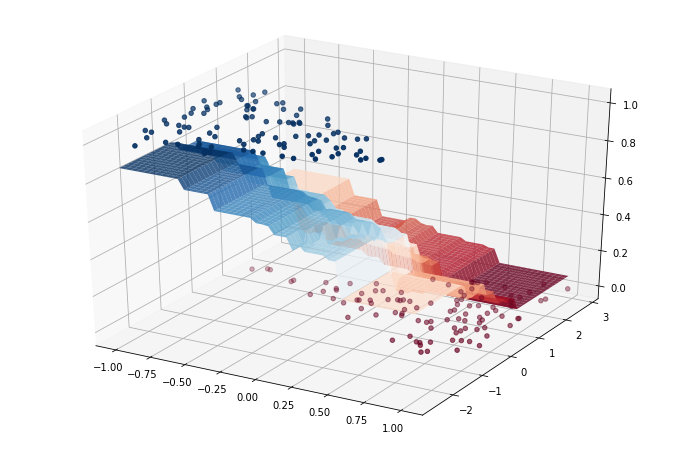

In [130]:
make_plot(AdaBoostClassifier(),X,y,1)

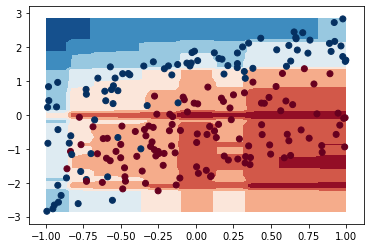

In [141]:
make_plot(AdaBoostClassifier(),X,y,0)